In [3]:
!pip install osmnx
!apt install python3-rtree

     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 10.3 MB 31.8 MB/s 
     |████████████████████████████████| 994 kB 73.7 MB/s 
     |████████████████████████████████| 6.6 MB 44.8 MB/s 
     |████████████████████████████████| 62 kB 782 kB/s 
     |████████████████████████████████| 994 kB 40.3 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import matplotlib.pyplot as plt
import osmnx as ox
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.ndimage import distance_transform_edt
import pandas as pd
import itertools
import matplotlib
import networkx as nx
import folium
import statistics
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as colors
import matplotlib.cm as cmx
import sys
import os
import PIL 

In [3]:
py_file_location = "/content/drive/MyDrive/Silicon Valley Earthquake Challenge"
sys.path.append(os.path.abspath(py_file_location))

In [4]:
%load_ext autoreload 
import SiliconValleyHelperFunctions
%autoreload 2


In [33]:
help(SiliconValleyHelperFunctions)

Help on module SiliconValleyHelperFunctions:

NAME
    SiliconValleyHelperFunctions - Create a module object.

DESCRIPTION
    The name must be a string; the optional doc argument can have any type.

FUNCTIONS
    CalcualteDistanceTransform(block_name)
        This code is developed by Snajana Tule
        Here we are collacting all the steps necessary to add DistanceRiskScore to the matrix
    
    EdgesExtended(block_name, edges, distance)
        This procedure was developed by Sanajana Tule
        It takes in block name,distance,edges as arguments 
        It returns the Extended Edges dataframe
    
    Line_to_list_lonlats(geom, summary, lon_index, lat_index)
        Function developed by Sanjana Tule
    
    MaxSpeedRiskScoreCalculator(master_file_path, edge)
        This function takes in the path of the Speed Limit Master File and imputes missing 
        values in the Edge dataframe
        This column would then be used in the Risk Score Calculation
        The edges dataf

In [5]:
##Read in the list of neighbourhoods of LA 
df=pd.read_csv('/content/drive/MyDrive/Silicon Valley Earthquake Challenge/LA_NEIGHBOURHOODS_LIST.csv',encoding='cp1252')
names_list = df.values.tolist()
names_list=['Chinatown']

In [31]:
names_list=['Northridge']
speed_master_file_path='/content/drive/MyDrive/Silicon Valley Earthquake Challenge/'
speed_master_file_path_2 = '/content/drive/MyDrive/Silicon Valley Earthquake Challenge/SPEED_LIMIT_MASTER.CSV'
for name in names_list:
  #edges=SiliconValleyHelperFunctions.block_to_shape(name)
  #distance= SiliconValleyHelperFunctions.CalcualteDistanceTransform('Northridge')
  edges_extended = SiliconValleyHelperFunctions.EdgesExtended(name,edges,distance)
  edges_extended=SiliconValleyHelperFunctions.SpeedLimitColumnFormatter(edges_extended)
  #BELOW IS ONE TIME ONLY
  #SiliconValleyHelperFunctions.SpeedMasterFileGenerator(speed_master_file_path,edges_extended)
  edges_extended=SiliconValleyHelperFunctions.MaxSpeedRiskScoreCalculator(speed_master_file_path_2,edges_extended)

# SCRATCH 

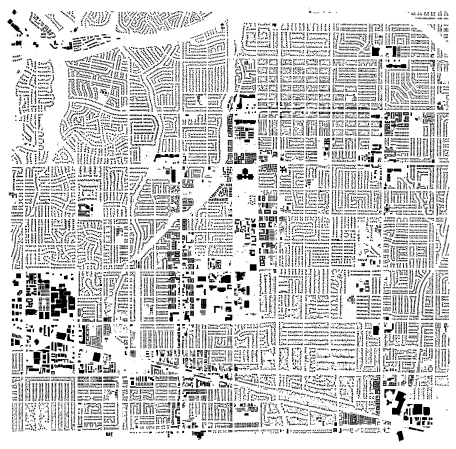

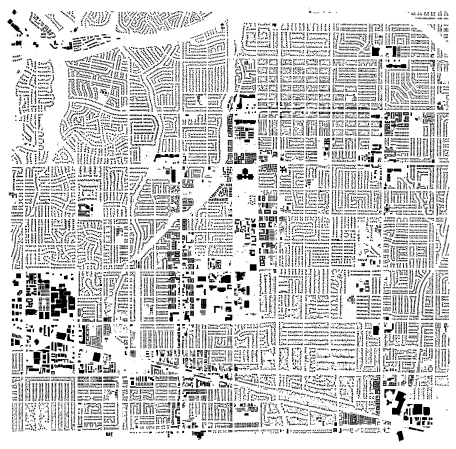

In [ ]:
distance= SiliconValleyHelperFunctions.CalcualteDistanceTransform('Northridge')

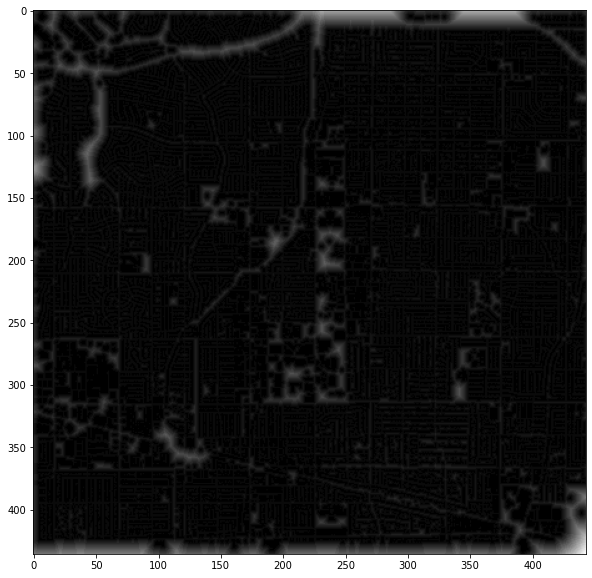

In [7]:
plt.figure(figsize = (10,10))
plt.imshow(distance,cmap = plt.cm.gray)
plt.show()

In [32]:
edges_extended.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22335 entries, 0 to 22334
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   osmid                   22335 non-null  object  
 1   name                    7770 non-null   object  
 2   highway                 22335 non-null  object  
 3   maxspeed                3806 non-null   object  
 4   oneway                  22335 non-null  bool    
 5   length                  22335 non-null  float64 
 6   lanes                   2708 non-null   object  
 7   access                  2135 non-null   object  
 8   geometry                22335 non-null  geometry
 9   service                 3889 non-null   object  
 10  width                   420 non-null    object  
 11  bridge                  64 non-null     object  
 12  ref                     3 non-null      object  
 13  tunnel                  8 non-null      object  
 14  sampling_count

In [30]:
edges_extended

,osmid,name,highway,maxspeed,oneway,length,lanes,access,geometry,service,width,bridge,ref,tunnel,sampling_counts,max,min,mean,median,x_y,lon_lat,mean_scaled,median_scaled,mean_scaled_inversed,median_scaled_inversed,distance_risk_score,highway_single_element,max_speed_risk_score,risk_score
0,15240187,Chase Street,residential,25 mph,False,12.338,NaN,NaN,"LINESTRING (-118.56231 34.22461, -118.56218 34...",NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,4.0,4.0,"[[442, 404]]","[[-118.562311, 34.2246072]]",1.868246,1.868246,146.544913,146.544913,21.0,residential,25.0,8.0
1,400864506,Corbin Avenue,secondary,NaN,False,8.751,NaN,NaN,"LINESTRING (-118.56231 34.22461, -118.56231 34...",NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,4.0,4.0,"[[442, 404]]","[[-118.562311, 34.2246072]]",1.868246,1.868246,146.544913,146.544913,21.0,secondary,40.0,6.0
2,400864518,Corbin Avenue,secondary,NaN,False,8.818,NaN,NaN,"LINESTRING (-118.56231 34.22461, -118.56231 34...",NaN,NaN,NaN,NaN,NaN,1,4.0,4.0,4.0,4.0,"[[442, 404]]","[[-118.562311, 34.2246072]]",1.868246,1.868246,146.544913,146.544913,21.0,secondary,40.0,6.0
3,399318632,Nordhoff Street,primary,40 mph,False,14.892,7,yes,"LINESTRING (-118.50254 34.23577, -118.50271 34...",NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,"[[442, 320]]","[[-118.5025435, 34.235766]]",1.231624,1.231624,147.181535,147.181535,23.0,primary,40.0,6.0
4,399318659,Nordhoff Street,primary,40 mph,False,13.342,7,yes,"LINESTRING (-118.50254 34.23577, -118.50240 34...",NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,"[[442, 320]]","[[-118.5025435, 34.235766]]",1.231624,1.231624,147.181535,147.181535,23.0,primary,40.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22330,974568014,NaN,service,NaN,True,7.359,NaN,NaN,"LINESTRING (-118.55635 34.23675, -118.55631 34...",NaN,NaN,NaN,NaN,NaN,1,2.0,2.0,2.0,2.0,"[[442, 313]]","[[-118.5563523, 34.2367508]]",1.231624,1.231624,147.181535,147.181535,23.0,service,15.0,9.0
22331,427745853,NaN,service,NaN,False,17.981,NaN,NaN,"LINESTRING (-118.55717 34.23622, -118.55737 34...",parking_aisle,NaN,NaN,NaN,NaN,2,3.0,3.0,3.0,3.0,"[[442, 317], [442, 317]]","[[-118.5571744, 34.236219], [-118.55737, 34.23...",1.516897,1.516897,146.896262,146.896262,22.0,service,15.0,9.0
22332,974568015,NaN,service,NaN,False,19.072,NaN,NaN,"LINESTRING (-118.55717 34.23622, -118.55718 34...",parking_aisle,NaN,NaN,NaN,NaN,2,3.0,3.0,3.0,3.0,"[[442, 317], [442, 315]]","[[-118.5571744, 34.236219], [-118.5571775, 34....",1.516897,1.516897,146.896262,146.896262,22.0,service,15.0,9.0
22333,427745853,NaN,service,NaN,False,82.259,NaN,NaN,"LINESTRING (-118.55717 34.23622, -118.55647 34...",parking_aisle,NaN,NaN,NaN,NaN,5,3.0,3.0,3.0,3.0,"[[442, 317], [442, 317], [442, 317], [442, 317...","[[-118.5571744, 34.236219], [-118.556958974987...",1.516897,1.516897,146.896262,146.896262,22.0,service,15.0,9.0


In [35]:
nx.write_gpickle(edges_extended, '/content/drive/MyDrive/Silicon Valley Earthquake Challenge/Test.pickle')

/usr/local/lib/python3.7/dist-packages/networkx/utils/decorators.py:5: DeprecationWarning: write_gpickle is deprecated and will be removed in 3.0.Use ``pickle.dump(G, path, protocol)``
  import warnings
